In [1]:
from __future__ import annotations
import sys
    # caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, 'D:/books/python/0.Data Science from Scratch- First Principles with Python/data-science-from-scratch/scratch/')
sys.path

['D:\\books\\python\\0.Data Science from Scratch- First Principles with Python',
 'D:/books/python/0.Data Science from Scratch- First Principles with Python/data-science-from-scratch/scratch/',
 'C:\\Users\\lidan\\miniconda3\\python38.zip',
 'C:\\Users\\lidan\\miniconda3\\DLLs',
 'C:\\Users\\lidan\\miniconda3\\lib',
 'C:\\Users\\lidan\\miniconda3',
 '',
 'C:\\Users\\lidan\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\magic_impute-2.0.4-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\seqc-0.2.0-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\weasyprint-56.1-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\cairocffi-1.3.0-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\win32',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\Pythonwin']

In [2]:
from linear_algebra import Vector, dot

def step_function(x: float) -> float:
    return 1.0 if x >= 0 else 0.0

def perceptron_output(weights: Vector, bias: float, x: Vector) -> float:
    """Returns 1 if the perceptron 'fires', 0 if not"""
    calculation = dot(weights, x) + bias
    return step_function(calculation)

and_weights = [2., 2]
and_bias = -3.

assert perceptron_output(and_weights, and_bias, [1, 1]) == 1
assert perceptron_output(and_weights, and_bias, [0, 1]) == 0
assert perceptron_output(and_weights, and_bias, [1, 0]) == 0
assert perceptron_output(and_weights, and_bias, [0, 0]) == 0

In [3]:
or_weights = [2., 2]
or_bias = -1.

assert perceptron_output(or_weights, or_bias, [1, 1]) == 1
assert perceptron_output(or_weights, or_bias, [0, 1]) == 1
assert perceptron_output(or_weights, or_bias, [1, 0]) == 1
assert perceptron_output(or_weights, or_bias, [0, 0]) == 0

In [4]:
not_weights = [-2.]
not_bias = 1.

assert perceptron_output(not_weights, not_bias, [0]) == 1
assert perceptron_output(not_weights, not_bias, [1]) == 0

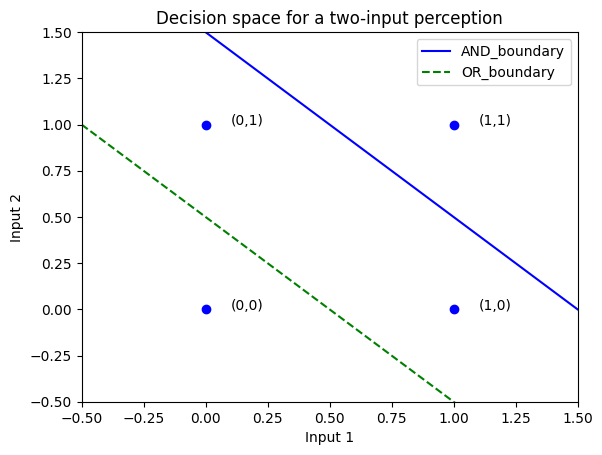

In [5]:
from matplotlib import pyplot as plt
import numpy as np

def AND_boundary(x: float) -> float:
    return (3.0-2*x)/2.0

def OR_boundary(x: float) -> float:
    return (1.0-2*x)/2.0

xs = np.linspace(-0.5, 1.5, 100)
Input1 = [AND_boundary(x) for x in xs]
Input2 = [OR_boundary(x) for x in xs]

plt.plot(xs, Input1, 'b-', label = 'AND_boundary')
plt.plot(xs, Input2, 'g--', label = 'OR_boundary')
plt.plot([1, 1, 0, 0], [1, 0, 1, 0], 'bo')
plt.text(1.1,1, '(1,1)')
plt.text(1.1,0, '(1,0)')
plt.text(0.1,1, '(0,1)')
plt.text(0.1,0, '(0,0)')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.legend()
plt.title('Decision space for a two-input perception')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.show()

In [6]:
import math

def sigmoid(t: float) -> float:
    return 1 / (1 + math.exp(-t))

def neuron_output(weights: Vector, inputs: Vector) -> float:
    # weights includes the bias term, inputs includes a 1
    return sigmoid(dot(weights, inputs))

In [7]:
from typing import List

def feed_forward(neural_network: List[List[Vector]],
                 input_vector: Vector) -> List[Vector]:
    """
    Feeds the input vector through the neural network.
    Returns the outputs of all layers (not just the last one).
    """
    outputs: List[Vector] = []

    for layer in neural_network:
        input_with_bias = input_vector + [1]              # Add a constant.
        output = [neuron_output(neuron, input_with_bias)  # Compute the output
                  for neuron in layer]                    # for each neuron.
        outputs.append(output)                            # Add to results.

        # Then the input to the next layer is the output of this one
        input_vector = output

    return outputs

xor_network = [# hidden layer
               [[20., 20, -30],      # 'and' neuron
                [20., 20, -10]],     # 'or'  neuron
               # output layer
               [[-60., 60, -30]]]    # '2nd input but not 1st input' neuron

# feed_forward returns the outputs of all layers, so the [-1] gets the
# final output, and the [0] gets the value out of the resulting vector
assert 0.000 < feed_forward(xor_network, [0, 0])[-1][0] < 0.001
assert 0.999 < feed_forward(xor_network, [1, 0])[-1][0] < 1.000
assert 0.999 < feed_forward(xor_network, [0, 1])[-1][0] < 1.000
assert 0.000 < feed_forward(xor_network, [1, 1])[-1][0] < 0.001

In [29]:
hidden_outputs, outputs = feed_forward(xor_network, [1, 1])
hidden_outputs, outputs

([0.9999546021312976, 0.9999999999999065], [9.383146683006828e-14])

In [27]:
xor_network[-1]

[[-60.0, 60, -30]]

In [28]:
for i, neuron in enumerate(xor_network[-1]):
    print(i, neuron)

0 [-60.0, 60, -30]


In [8]:
feed_forward(xor_network, [0, 0])

[[9.357622968839299e-14, 4.5397868702434395e-05], [9.38314668300676e-14]]

In [10]:
feed_forward(xor_network, [0, 0])[-1][0]

9.38314668300676e-14

In [11]:
feed_forward(xor_network, [1, 0])

[[4.5397868702434395e-05, 0.9999546021312976], [0.9999999999999059]]

In [12]:
feed_forward(xor_network, [0, 1])

[[4.5397868702434395e-05, 0.9999546021312976], [0.9999999999999059]]

In [13]:
feed_forward(xor_network, [1, 1])

[[0.9999546021312976, 0.9999999999999065], [9.383146683006828e-14]]

In [14]:
def sqerror_gradients(network: List[List[Vector]],
                      input_vector: Vector,
                      target_vector: Vector) -> List[List[Vector]]:
    """
    Given a neural network, an input vector, and a target vector,
    make a prediction and compute the gradient of the squared error
    loss with respect to the neuron weights.
    """
    # forward pass
    hidden_outputs, outputs = feed_forward(network, input_vector)

    # gradients with respect to output neuron pre-activation outputs
    output_deltas = [output * (1 - output) * (output - target)
                     for output, target in zip(outputs, target_vector)]

    # gradients with respect to output neuron weights
    output_grads = [[output_deltas[i] * hidden_output
                     for hidden_output in hidden_outputs + [1]]
                    for i, output_neuron in enumerate(network[-1])]

    # gradients with respect to hidden neuron pre-activation outputs
    hidden_deltas = [hidden_output * (1 - hidden_output) *
                         dot(output_deltas, [n[i] for n in network[-1]])
                     for i, hidden_output in enumerate(hidden_outputs)]

    # gradients with respect to hidden neuron weights
    hidden_grads = [[hidden_deltas[i] * input for input in input_vector + [1]]
                    for i, hidden_neuron in enumerate(network[0])]

    return [hidden_grads, output_grads]

In [18]:
for x, y in zip(xs, ys):
    print(x, y)

[0.0, 0] [0.0]
[0.0, 1] [1.0]
[1.0, 0] [1.0]
[1.0, 1] [0.0]


In [16]:
import random
random.seed(0)
    
# training data
xs = [[0., 0], [0., 1], [1., 0], [1., 1]]
ys = [[0.], [1.], [1.], [0.]]
    
# start with random weights
network = [ # hidden layer: 2 inputs -> 2 outputs
    [[random.random() for _ in range(2 + 1)],   # 1st hidden neuron
    [random.random() for _ in range(2 + 1)]],  # 2nd hidden neuron
    # output layer: 2 inputs -> 1 output
    [[random.random() for _ in range(2 + 1)]]   # 1st output neuron
]
    
from gradient_descent import gradient_step
import tqdm
    
learning_rate = 1.0
    
for epoch in tqdm.trange(20000, desc="neural net for xor"):
        for x, y in zip(xs, ys):
            gradients = sqerror_gradients(network, x, y)
    
            # Take a gradient step for each neuron in each layer
            network = [[gradient_step(neuron, grad, -learning_rate)
                        for neuron, grad in zip(layer, layer_grad)]
                       for layer, layer_grad in zip(network, gradients)]

neural net for xor: 100%|█████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 12936.29it/s]


In [17]:
network

[[[6.953505610104289, 6.952785792366962, -3.1484761965046655],
  [5.115899442661922, 5.115407875835949, -7.839603434415663]],
 [[10.961705832630562, -11.63060534664317, -5.144229056613082]]]

In [36]:
network = [ # hidden layer: 2 inputs -> 2 outputs
    [[random.random() for _ in range(2 + 1)],   # 1st hidden neuron
    [random.random() for _ in range(2 + 1)]],  # 2nd hidden neuron
    # output layer: 2 inputs -> 1 output
    [[random.random() for _ in range(2 + 1)]]   # 1st output neuron
]
network

[[[0.2966412512769129, 0.44178363318767744, 0.604669902191143],
  [0.5361650260862432, 0.2609879767339395, 0.23178787541805523]],
 [[0.11873023670071103, 0.7834936358921726, 0.09890076646638046]]]

In [50]:
network = [ # hidden layer: 2 inputs -> 2 outputs
    [[random.random() for _ in range(2 + 1)],   # 1st hidden neuron
    [random.random() for _ in range(2 + 1)]],  # 2nd hidden neuron
    # output layer: 2 inputs -> 1 output
    [[random.random() for _ in range(2 + 1)]]   # 1st output neuron
]
xs = [[0., 0], [0., 1], [1., 0], [1., 1]]
ys = [[0.], [1.], [1.], [0.]]

for x, y in zip(xs, ys):
    gradients = sqerror_gradients(network, x, y)
    
gradients

[[[0.011723046735366406, 0.011723046735366406, 0.011723046735366406],
  [0.01075129463076795, 0.01075129463076795, 0.01075129463076795]],
 [[0.10345656197860927, 0.11863001971064034, 0.13262059335296975]]]

In [51]:
for layer, layer_grad in zip(network, gradients):
    print(layer, layer_grad)

[[0.7328850061793606, 0.2487736956630997, 0.28455698400578255], [0.7360834330107994, 0.6596207917216363, 0.7419215555155583]] [[0.011723046735366406, 0.011723046735366406, 0.011723046735366406], [0.01075129463076795, 0.01075129463076795, 0.01075129463076795]]
[[0.5152830587943614, 0.8590958196652707, 0.12179389137547159]] [[0.10345656197860927, 0.11863001971064034, 0.13262059335296975]]


In [35]:
for x, y in zip(xs, ys):
    print(x, y)

[0.0, 0] [0.0]
[0.0, 1] [1.0]
[1.0, 0] [1.0]
[1.0, 1] [0.0]


In [37]:
feed_forward(network, [0.0, 0])

[[0.6467239780801427, 0.5576889187575238], [0.6485410029692491]]

In [38]:
hidden_outputs, outputs = feed_forward(network, [0.0, 0])
hidden_outputs

[0.6467239780801427, 0.5576889187575238]

In [41]:
network

[[[0.2966412512769129, 0.44178363318767744, 0.604669902191143],
  [0.5361650260862432, 0.2609879767339395, 0.23178787541805523]],
 [[0.11873023670071103, 0.7834936358921726, 0.09890076646638046]]]

In [39]:
network[-1]

[[0.11873023670071103, 0.7834936358921726, 0.09890076646638046]]

In [40]:
[n[i] for n in network[-1] for i, hidden_output in enumerate(hidden_outputs)]

[0.11873023670071103, 0.7834936358921726]

In [42]:
outputs

[0.6485410029692491]

In [43]:
output_deltas = [output * (1 - output) * (output - target) for output, target in zip(outputs, [0.0])]
output_deltas

[0.14782556346350825]

In [45]:
hidden_outputs

[0.6467239780801427, 0.5576889187575238]

In [46]:
hidden_deltas = [hidden_output * (1 - hidden_output) *
                 dot(output_deltas, [n[i] for n in network[-1]])
                 for i, hidden_output in enumerate(hidden_outputs)]

hidden_deltas

[0.004009996571194248, 0.02856964548278088]

In [48]:
network[0]

[[0.2966412512769129, 0.44178363318767744, 0.604669902191143],
 [0.5361650260862432, 0.2609879767339395, 0.23178787541805523]]

In [49]:
for i, hidden_neuron in enumerate(network[0]):
    print(i, hidden_neuron)

0 [0.2966412512769129, 0.44178363318767744, 0.604669902191143]
1 [0.5361650260862432, 0.2609879767339395, 0.23178787541805523]


In [47]:
hidden_grads = [[hidden_deltas[i] * input for input in [0.0, 0] + [1]]
                for i, hidden_neuron in enumerate(network[0])]

hidden_grads

[[0.0, 0.0, 0.004009996571194248], [0.0, 0.0, 0.02856964548278088]]

In [15]:
[   # hidden layer
    [[7, 7, -3],     # computes OR
     [5, 5, -8]],    # computes AND
    # output layer
    [[11, -12, -5]]  # computes "first but not second"
]

[[[7, 7, -3], [5, 5, -8]], [[11, -12, -5]]]

In [19]:
def fizz_buzz_encode(x: int) -> Vector:
    if x % 15 == 0:
        return [0, 0, 0, 1]
    elif x % 5 == 0:
        return [0, 0, 1, 0]
    elif x % 3 == 0:
        return [0, 1, 0, 0]
    else:
        return [1, 0, 0, 0]

assert fizz_buzz_encode(2) == [1, 0, 0, 0]
assert fizz_buzz_encode(6) == [0, 1, 0, 0]
assert fizz_buzz_encode(10) == [0, 0, 1, 0]
assert fizz_buzz_encode(30) == [0, 0, 0, 1]

In [20]:
def binary_encode(x: int) -> Vector:
    binary: List[float] = []

    for i in range(10):
        binary.append(x % 2)
        x = x // 2

    return binary

#                             1  2  4  8 16 32 64 128 256 512
assert binary_encode(0)   == [0, 0, 0, 0, 0, 0, 0, 0,  0,  0]
assert binary_encode(1)   == [1, 0, 0, 0, 0, 0, 0, 0,  0,  0]
assert binary_encode(10)  == [0, 1, 0, 1, 0, 0, 0, 0,  0,  0]
assert binary_encode(101) == [1, 0, 1, 0, 0, 1, 1, 0,  0,  0]
assert binary_encode(999) == [1, 1, 1, 0, 0, 1, 1, 1,  1,  1]

In [52]:
binary_encode(0)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [54]:
1 % 2, 1 // 2

(1, 0)

In [55]:
def argmax(xs: list) -> int:
    """Returns the index of the largest value"""
    return max(range(len(xs)), key=lambda i: xs[i])

assert argmax([0, -1]) == 0               # items[0] is largest
assert argmax([-1, 0]) == 1               # items[1] is largest
assert argmax([-1, 10, 5, 20, -3]) == 3   # items[3] is largest


In [63]:
xs = [binary_encode(n) for n in range(101, 1024)]
ys = [fizz_buzz_encode(n) for n in range(101, 1024)]
    
NUM_HIDDEN = 25
    
network = [
        # hidden layer: 10 inputs -> NUM_HIDDEN outputs
        [[random.random() for _ in range(10 + 1)] for _ in range(NUM_HIDDEN)],
    
        # output_layer: NUM_HIDDEN inputs -> 4 outputs
        [[random.random() for _ in range(NUM_HIDDEN + 1)] for _ in range(4)]
]

In [64]:
from linear_algebra import squared_distance
    
learning_rate = 1.0
    
with tqdm.trange(500) as t:
        for epoch in t:
            epoch_loss = 0.0
    
            for x, y in zip(xs, ys):
                predicted = feed_forward(network, x)[-1]
                epoch_loss += squared_distance(predicted, y)
                gradients = sqerror_gradients(network, x, y)
    
                # Take a gradient step for each neuron in each layer
                network = [[gradient_step(neuron, grad, -learning_rate)
                            for neuron, grad in zip(layer, layer_grad)]
                        for layer, layer_grad in zip(network, gradients)]
    
            t.set_description(f"fizz buzz (loss: {epoch_loss:.2f})")

fizz buzz (loss: 32.36): 100%|███████████████████████████████████████████████████████| 500/500 [02:23<00:00,  3.48it/s]


In [65]:
num_correct = 0
    
for n in range(1, 101):
        x = binary_encode(n)
        predicted = argmax(feed_forward(network, x)[-1])
        actual = argmax(fizz_buzz_encode(n))
        labels = [str(n), "fizz", "buzz", "fizzbuzz"]
        print(n, labels[predicted], labels[actual])
    
        if predicted == actual:
            num_correct += 1

1 1 1
2 2 2
3 fizz fizz
4 4 4
5 buzz buzz
6 fizz fizz
7 7 7
8 8 8
9 fizz fizz
10 buzz buzz
11 11 11
12 fizz fizz
13 13 13
14 14 14
15 fizzbuzz fizzbuzz
16 16 16
17 17 17
18 fizz fizz
19 19 19
20 20 buzz
21 fizz fizz
22 22 22
23 23 23
24 fizz fizz
25 25 buzz
26 26 26
27 fizz fizz
28 28 28
29 29 29
30 fizzbuzz fizzbuzz
31 31 31
32 32 32
33 fizz fizz
34 34 34
35 buzz buzz
36 fizz fizz
37 37 37
38 38 38
39 fizz fizz
40 buzz buzz
41 41 41
42 fizz fizz
43 43 43
44 44 44
45 fizzbuzz fizzbuzz
46 46 46
47 47 47
48 fizz fizz
49 49 49
50 buzz buzz
51 fizz fizz
52 52 52
53 53 53
54 fizz fizz
55 buzz buzz
56 56 56
57 fizz fizz
58 58 58
59 59 59
60 fizzbuzz fizzbuzz
61 61 61
62 62 62
63 fizz fizz
64 64 64
65 65 buzz
66 fizz fizz
67 67 67
68 buzz 68
69 fizz fizz
70 buzz buzz
71 71 71
72 fizz fizz
73 73 73
74 74 74
75 fizzbuzz fizzbuzz
76 76 76
77 77 77
78 fizz fizz
79 79 79
80 buzz buzz
81 fizz fizz
82 82 82
83 83 83
84 fizz fizz
85 85 buzz
86 86 86
87 fizz fizz
88 88 88
89 89 89
90 fizzbuzz fizzbuzz

In [66]:
print(num_correct, "/", 100)

94 / 100
